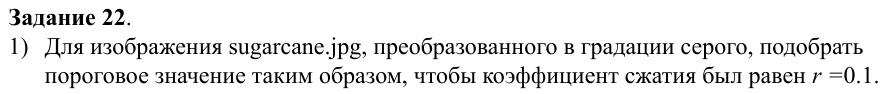

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [148]:
img = Image.open('sugarcane.jpg').convert('L')
img_array = np.array(img)
H, W = img_array.shape
img_size = H * W
coeffs = np.fft.fft2(img_array)
sorted_coeffs = np.sort(np.abs(coeffs).flatten())[::-1]

r = 0.1

def g(T):
    return np.sum(np.abs(coeffs) >= T)

def h(T):
    return (W * H - g(T)) / (W * H)

# Псевдобинарный поиск порога
low = 0
high = len(sorted_coeffs) - 1

while low <= high:
    mid = (low + high) // 2
    threshold = sorted_coeffs[mid]

    num_above_threshold = mid + 1
    compression_ratio = (img_size - num_above_threshold) / img_size

    if np.isclose(compression_ratio, r, atol=0.01):
        print(f"Порог: {threshold:.0f}")
        break
    elif compression_ratio < r:
        high = mid - 1
    else:
        low = mid + 1

Порог: 1367


Коэффициент сжатия: 0.1


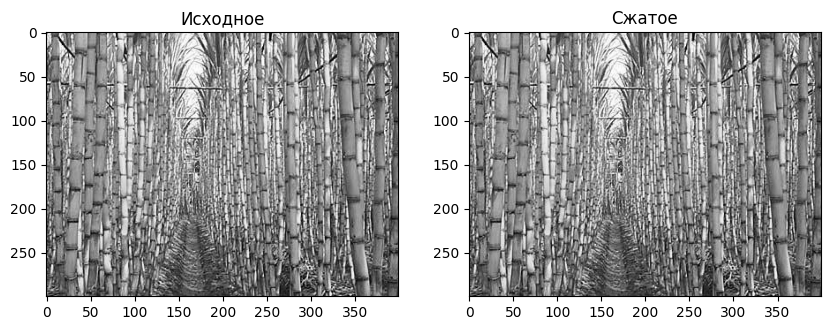

In [149]:
T = 1367
compression_ratio = h(T)
print(f"Коэффициент сжатия: {compression_ratio:.1f}")

thresholded_coeffs = np.where(np.abs(coeffs) >= T, coeffs, 0)
compressed_img = np.real(np.fft.ifft2(thresholded_coeffs))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Исходное')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img, cmap='gray')
plt.title('Сжатое')

plt.show()

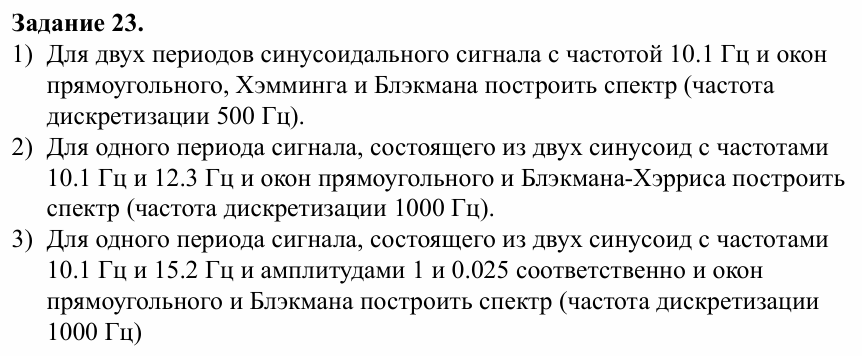

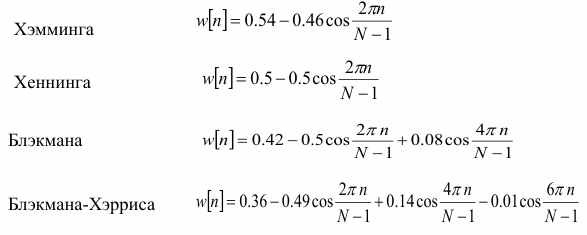

In [158]:
def rectangular_window(N):
    return np.ones(N)

def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

def blackman_window(N):
    return 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1)) + 0.08 * np.cos(4 * np.pi * np.arange(N) / (N - 1))

def blackman_harris_window(N):
    return 0.35875 - 0.48829 * np.cos(2 * np.pi * np.arange(N) / (N - 1)) + 0.14128 * np.cos(4 * np.pi * np.arange(N) / (N - 1)) - 0.01168 * np.cos(6 * np.pi * np.arange(N) / (N - 1))

In [189]:
def plot_signal(signal, window, t, title):
    N = len(signal)
    windowed_signal = signal * window(N)

    plt.figure(figsize=(8, 7))
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title("Сигнал")
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(np.arange(N), window(N))
    plt.title("Окно")
    plt.xlabel("Отсчет")
    plt.ylabel("Амплитуда")
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(t, windowed_signal)
    plt.title(title)
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")
    plt.grid()

    plt.tight_layout()
    plt.show()

def plot_spectrum_db(signal, window, fs, title, N_fft=2**13):
    N = len(signal)
    windowed_signal = signal * window(N)
    fft = np.fft.fft(windowed_signal, n=N_fft)
    amplitude = np.abs(fft[:N_fft//2]) / N
    db_spectrum = 20 * np.log10(amplitude + 1e-12)
    frequencies = np.linspace(0, fs/2, N_fft//2)

    plt.plot(frequencies, db_spectrum, label=title)

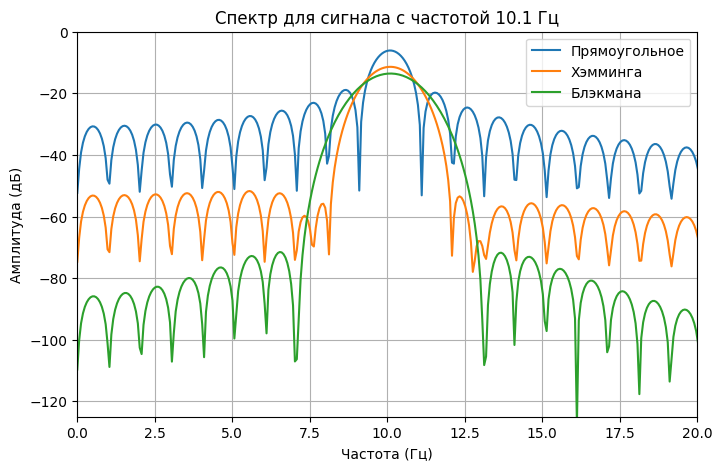

In [190]:
fs1 = 500
freq1 = 10.1
duration1 = 1
t1 = np.linspace(0, duration1, int(fs1 * duration1), endpoint=False)
signal1 = np.sin(2 * np.pi * freq1 * t1)
N1 = len(signal1)

plt.figure(figsize=(8, 5))

plot_spectrum_db(signal1, rectangular_window, fs1, "Прямоугольное")
plot_spectrum_db(signal1, hamming_window, fs1, "Хэмминга")
plot_spectrum_db(signal1, blackman_window, fs1, "Блэкмана")

plt.title("Спектр для сигнала с частотой 10.1 Гц")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда (дБ)")
plt.xlim(0, 20)
plt.ylim(-125, 0)
plt.legend()
plt.grid()
plt.show()

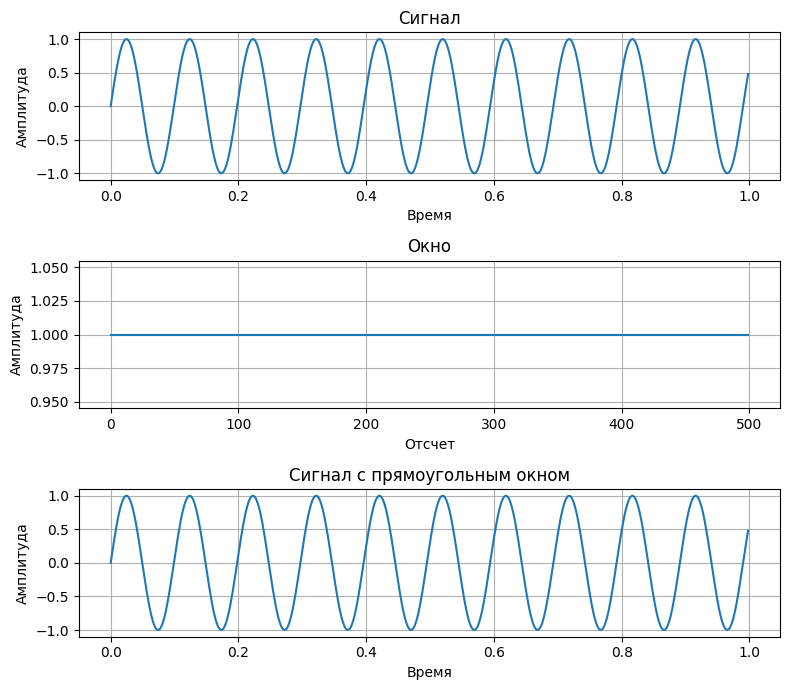

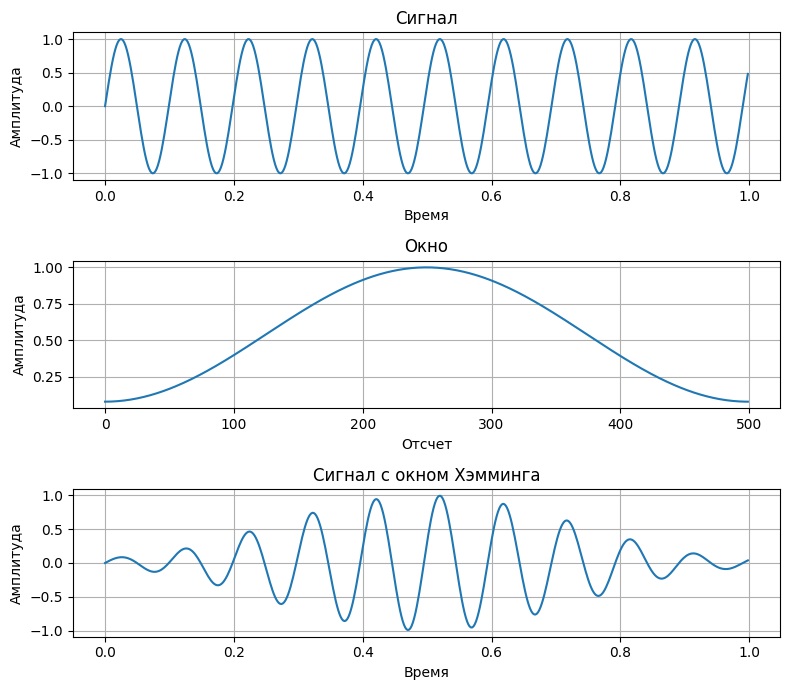

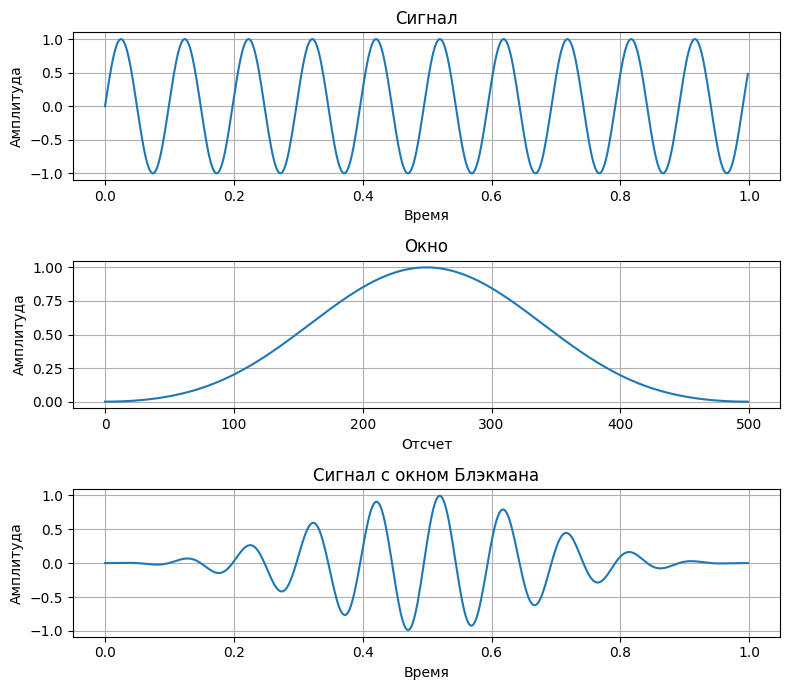

In [191]:
plot_signal(signal1, rectangular_window, t1, "Сигнал с прямоугольным окном")
plot_signal(signal1, hamming_window, t1, "Сигнал с окном Хэмминга")
plot_signal(signal1, blackman_window, t1, "Сигнал с окном Блэкмана")

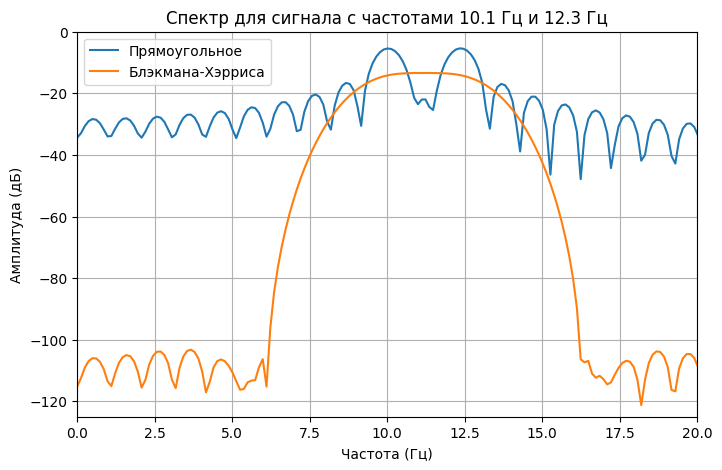

In [192]:
fs2 = 1000
freq2_1 = 10.1
freq2_2 = 12.3
duration2 = 1
t2 = np.linspace(0, duration2, int(fs2 * duration2), endpoint=False)
signal2 = np.sin(2 * np.pi * freq2_1 * t2) + np.sin(2 * np.pi * freq2_2 * t2)
N2 = len(signal2)

rect_window2 = rectangular_window(N2)
blackman_harris_window2 = blackman_harris_window(N2)

plt.figure(figsize=(8, 5))

plot_spectrum_db(signal2, rectangular_window, fs2, "Прямоугольное")
plot_spectrum_db(signal2, blackman_harris_window, fs2, "Блэкмана-Хэрриса")

plt.title("Спектр для сигнала с частотами 10.1 Гц и 12.3 Гц")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда (дБ)")
plt.xlim(0, 20)
plt.ylim(-125, 0)
plt.legend()
plt.grid()
plt.show()

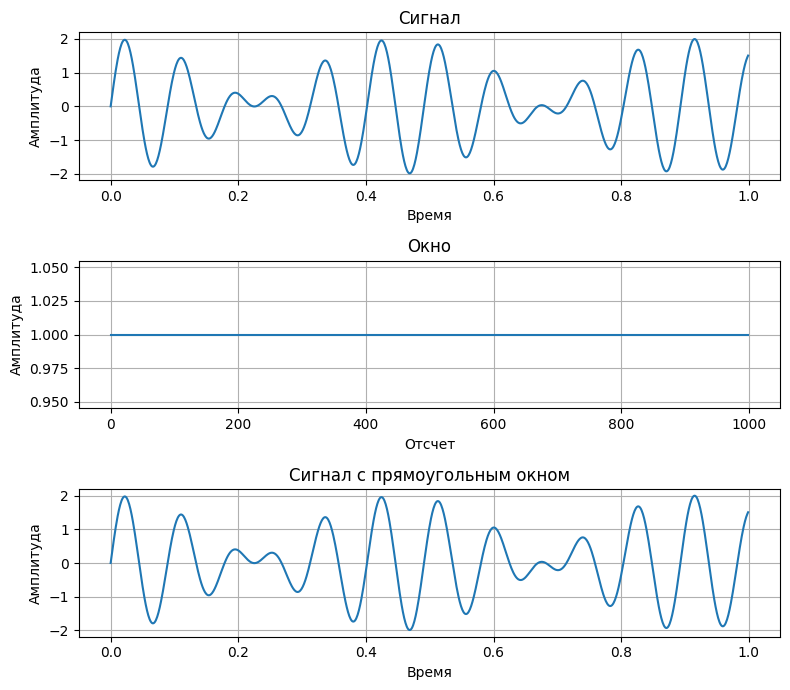

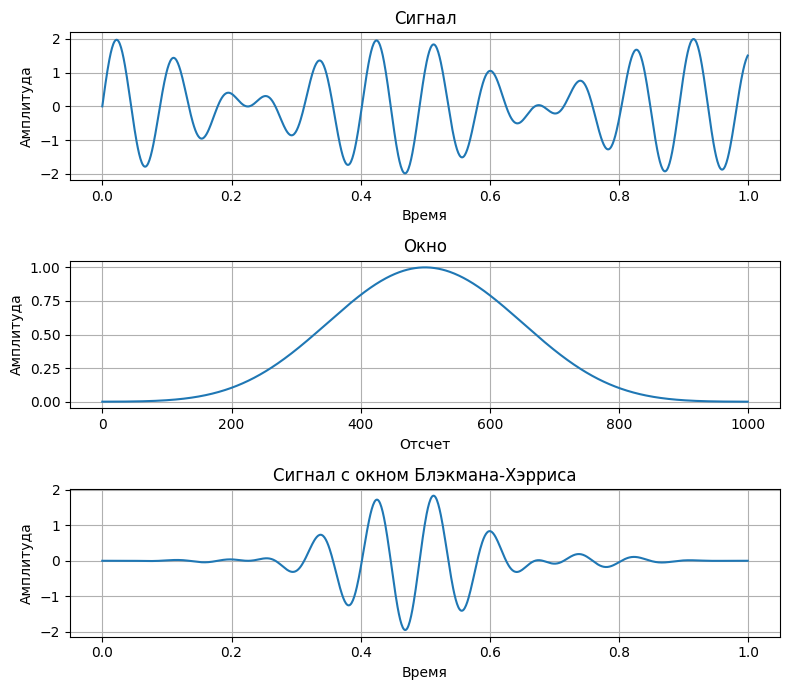

In [193]:
plot_signal(signal2, rectangular_window, t2, "Сигнал с прямоугольным окном")
plot_signal(signal2, blackman_harris_window, t2, "Сигнал с окном Блэкмана-Хэрриса")

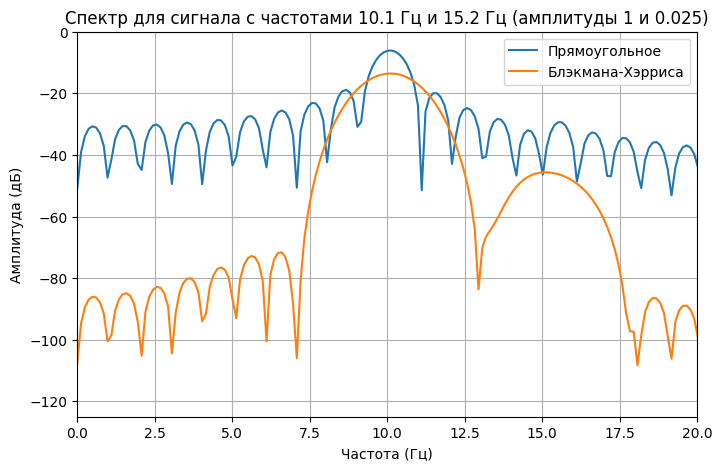

In [194]:
fs3 = 1000
freq3_1 = 10.1
freq3_2 = 15.2
amp3_1 = 1
amp3_2 = 0.025
duration3 = 1
t3 = np.linspace(0, duration3, int(fs3 * duration3), endpoint=False)
signal3 = amp3_1 * np.sin(2 * np.pi * freq3_1 * t3) + amp3_2 * np.sin(2 * np.pi * freq3_2 * t3)

plt.figure(figsize=(8, 5))

plot_spectrum_db(signal3, rectangular_window, fs3, "Прямоугольное")
plot_spectrum_db(signal3, blackman_window, fs3, "Блэкмана-Хэрриса")

plt.title("Спектр для сигнала с частотами 10.1 Гц и 15.2 Гц (амплитуды 1 и 0.025)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда (дБ)")
plt.xlim(0, 20)
plt.ylim(-125, 0)
plt.legend()
plt.grid()
plt.show()

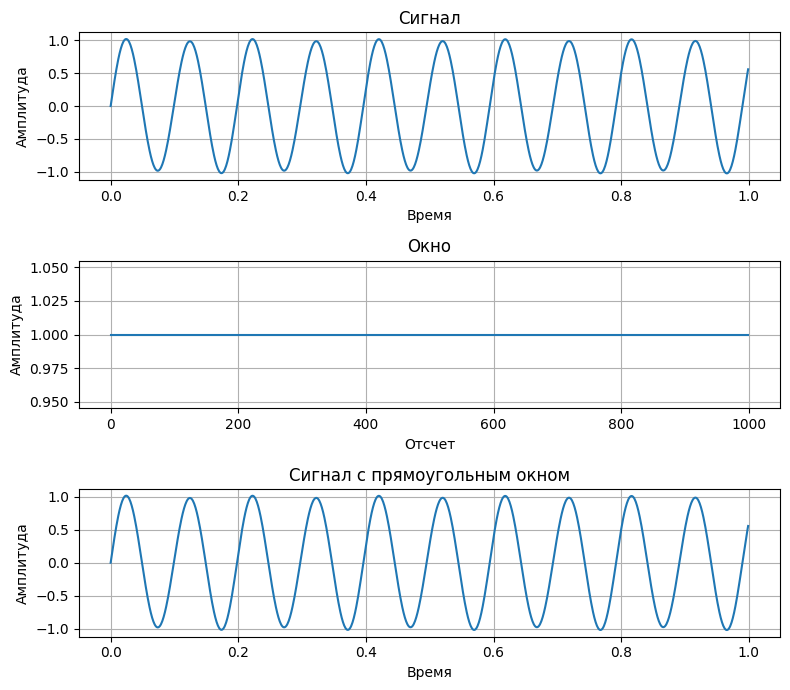

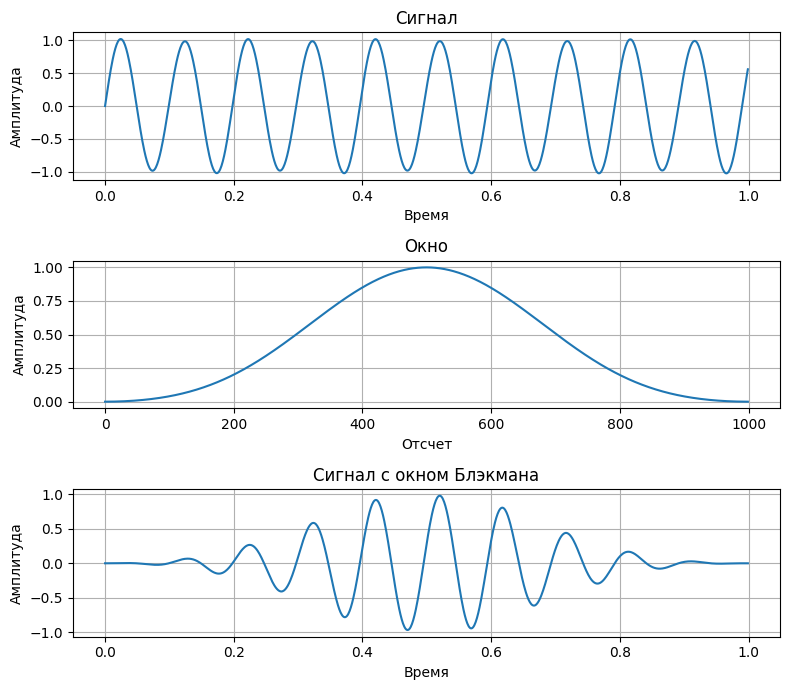

In [195]:
plot_signal(signal3, rectangular_window, t3, "Сигнал с прямоугольным окном")
plot_signal(signal3, blackman_window, t3, "Сигнал с окном Блэкмана")